## Suport Vector Regression

1.   Create a model to predict the previous salary based on the position level.
2.   **Input** = Position_Salaries.csv





## Importing the libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt       #graphs
import pandas as pd

# Importing the dataset

In [36]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values      #There is no need to use the column Position
y = dataset.iloc[:,-1].values


In [37]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

In [38]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scailing

In [39]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)

y = sc_y.fit_transform(y)


In [40]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [41]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR model on the whole set

In [42]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicting a new result

In [47]:
y_var = (regressor.predict(sc_x.transform([[6.5]])))      #a value on fit scailing range
y_pred = sc_y.inverse_transform(y_var)                    #a prediction on original range
print(y_pred)

[170370.0204065]


# Visualising the SVR results

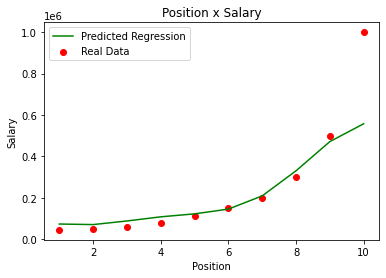

In [51]:
x_axes = sc_x.inverse_transform(x)
y_axes = sc_y.inverse_transform(y)
plt.scatter(x_axes, y_axes, color = 'red', label='Real Data')
plt.plot(x_axes,sc_y.inverse_transform(regressor.predict(x)), color = 'green', label='Predicted Regression' )
plt.title('Position x Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Visualising the VSR  results HD

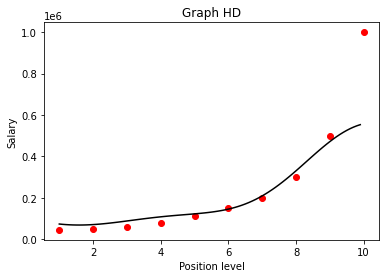

In [56]:
x_grid = np.arange(min(x_axes), max(x_axes), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x_axes,y_axes,color='red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))),color='black')
plt.title('Graph HD')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

###The SVR does not catch an outlier from the trend (x=10)
- take care about the kernel for linear and non-linear data